In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xbbg import blp

In [117]:
df = blp.bdh(tickers='SPY US Equity',flds=['Open','High','Low','last_price'],start_date='2023-01-01',end_date='2024-09-06')
df.columns = df.columns.get_level_values(0)
df.columns = ['Open','High','Low','Close']
df.index = pd.to_datetime(df.index)

In [118]:
df

,Open,High,Low,Close
2023-01-03,384.37,386.4300,377.8310,380.82
2023-01-04,383.18,385.8800,380.0000,383.76
2023-01-05,381.72,381.8400,378.7600,379.38
2023-01-06,382.61,389.2500,379.4127,388.08
2023-01-09,390.37,393.7000,387.6700,387.86
...,...,...,...,...
2024-08-30,560.77,564.2000,557.1400,563.68
2024-09-03,560.47,560.8100,549.5100,552.08
2024-09-04,550.20,554.4300,549.4600,550.95
2024-09-05,550.89,553.7995,547.1000,549.61


## ATR

In [119]:
def wwma(values, n):
    """
     J. Welles Wilder's EMA 
    """
    return values.ewm(alpha=1/n, adjust=False).mean()

def atr(df, n=20):
    data = df.copy()
    high = data['High']
    low = data['Low']
    close = data['Close']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = wwma(tr, n)
    return atr

In [120]:
df['ATR20'] = atr(df,n=20)

In [124]:
df

,Open,High,Low,Close,ATR20
2023-01-03,384.37,386.4300,377.8310,380.82,8.599000
2023-01-04,383.18,385.8800,380.0000,383.76,8.463050
2023-01-05,381.72,381.8400,378.7600,379.38,8.289897
2023-01-06,382.61,389.2500,379.4127,388.08,8.368903
2023-01-09,390.37,393.7000,387.6700,387.86,8.251957
...,...,...,...,...,...
2024-08-30,560.77,564.2000,557.1400,563.68,7.191681
2024-09-03,560.47,560.8100,549.5100,552.08,7.540597
2024-09-04,550.20,554.4300,549.4600,550.95,7.412067
2024-09-05,550.89,553.7995,547.1000,549.61,7.376439


In [128]:
df['t+1_UB'] = df['Close'].shift(1) + df['ATR20'].shift(1)
df['t+1_LB'] = df['Close'].shift(1) - df['ATR20'].shift(1)


<Axes: >

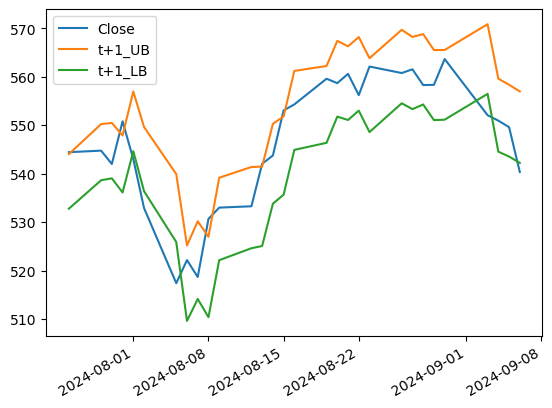

In [132]:
df[['Close','t+1_UB','t+1_LB']].iloc[-30:].plot()

array([<Axes: >, <Axes: >], dtype=object)

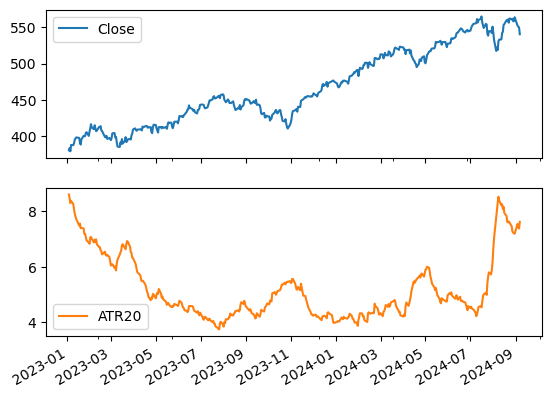

In [122]:
df[['Close','ATR20']].plot(subplots=True)

## Parkison Volatility Estimator

In [ ]:
def parkinson(price_data, window=5, ann_factor=1,clean=True):
    rs = (1.0 / (4.0 * np.log(2.0))) * ((price_data['High'] / price_data['Low']).apply(np.log)**2.0)
    def f(v):
        return (ann_factor * v.mean()) **0.5
    result = rs.rolling(window=window, center=False).apply(func=f)
    if clean:
        return result.dropna()
    else:
        return result

In [ ]:
df['HV5'] = parkinson(df, window=5,ann_factor=1)

## GARCH